## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  58.134913   384.541638  0.379359  9.830596  1.141244
1  54.806941   735.706870  0.235655  7.697741  1.365596
2  46.988023  1076.777642  0.573705  2.206559  1.453284
3  76.470724  1578.149484  0.378328  3.466998  1.264279
4  81.972732  1458.902623  0.391364  9.104891  1.472185


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9596901	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9502191	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9385129	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9290173	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9190649	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9065771	total: 71.2ms	remaining: 11.8s
6:	learn: 0.8962218	total: 71.7ms	remaining: 10.2s
7:	learn: 0.8838664	total: 72.1ms	remaining: 8.93s
8:	learn: 0.8729668	total: 72.5ms	remaining: 7.98s
9:	learn: 0.8630167	total: 73ms	remaining: 7.22s
10:	learn: 0.8552797	total: 73.3ms	remaining: 6.59s
11:	learn: 0.8457387	total: 73.7ms	remaining: 6.07s
12:	learn: 0.8371987	total: 74.2ms	remaining: 5.64s
13:	learn: 0.8281804	total: 74.7ms	remaining: 5.26s
14:	learn: 0.8169851	total: 75.1ms	remaining: 4.93s
15:	learn: 0.8084593	total: 75.5ms	remaining: 4.64s
16:	learn: 0.7992901	total: 76ms	remaining: 4.39s
17:	learn: 0.7918877	total: 76.5ms	remaining: 4.17s
18:	learn: 0.7848778	total: 77ms	remaining: 3.97

97:	learn: 0.3798442	total: 110ms	remaining: 1.01s
98:	learn: 0.3775740	total: 110ms	remaining: 1s
99:	learn: 0.3752620	total: 111ms	remaining: 996ms
100:	learn: 0.3727989	total: 111ms	remaining: 988ms
101:	learn: 0.3692593	total: 111ms	remaining: 981ms
102:	learn: 0.3672860	total: 112ms	remaining: 975ms
103:	learn: 0.3647522	total: 112ms	remaining: 967ms
104:	learn: 0.3621032	total: 113ms	remaining: 960ms
105:	learn: 0.3595896	total: 113ms	remaining: 952ms
106:	learn: 0.3566943	total: 113ms	remaining: 946ms
107:	learn: 0.3544031	total: 114ms	remaining: 939ms
108:	learn: 0.3520353	total: 114ms	remaining: 933ms
109:	learn: 0.3500757	total: 115ms	remaining: 927ms
110:	learn: 0.3473081	total: 115ms	remaining: 919ms
111:	learn: 0.3450558	total: 115ms	remaining: 913ms
112:	learn: 0.3429294	total: 116ms	remaining: 908ms
113:	learn: 0.3406447	total: 116ms	remaining: 903ms
114:	learn: 0.3382798	total: 117ms	remaining: 897ms
115:	learn: 0.3359985	total: 117ms	remaining: 892ms
116:	learn: 0.3329

272:	learn: 0.1645697	total: 187ms	remaining: 497ms
273:	learn: 0.1640564	total: 187ms	remaining: 497ms
274:	learn: 0.1637382	total: 188ms	remaining: 495ms
275:	learn: 0.1634216	total: 188ms	remaining: 494ms
276:	learn: 0.1629521	total: 189ms	remaining: 493ms
277:	learn: 0.1623104	total: 189ms	remaining: 491ms
278:	learn: 0.1619745	total: 190ms	remaining: 490ms
279:	learn: 0.1615227	total: 190ms	remaining: 489ms
280:	learn: 0.1611270	total: 190ms	remaining: 487ms
281:	learn: 0.1606943	total: 191ms	remaining: 486ms
282:	learn: 0.1601667	total: 191ms	remaining: 485ms
283:	learn: 0.1599164	total: 192ms	remaining: 483ms
284:	learn: 0.1593968	total: 192ms	remaining: 482ms
285:	learn: 0.1588307	total: 193ms	remaining: 481ms
286:	learn: 0.1585130	total: 193ms	remaining: 479ms
287:	learn: 0.1580399	total: 193ms	remaining: 478ms
288:	learn: 0.1578090	total: 194ms	remaining: 476ms
289:	learn: 0.1571610	total: 194ms	remaining: 475ms
290:	learn: 0.1569802	total: 194ms	remaining: 474ms
291:	learn: 

511:	learn: 0.0862252	total: 292ms	remaining: 279ms
512:	learn: 0.0860205	total: 293ms	remaining: 278ms
513:	learn: 0.0856804	total: 293ms	remaining: 277ms
514:	learn: 0.0854794	total: 294ms	remaining: 277ms
515:	learn: 0.0852332	total: 294ms	remaining: 276ms
516:	learn: 0.0850082	total: 295ms	remaining: 275ms
517:	learn: 0.0846818	total: 295ms	remaining: 274ms
518:	learn: 0.0843959	total: 295ms	remaining: 274ms
519:	learn: 0.0840770	total: 296ms	remaining: 273ms
520:	learn: 0.0838838	total: 296ms	remaining: 272ms
521:	learn: 0.0836011	total: 297ms	remaining: 272ms
522:	learn: 0.0832826	total: 297ms	remaining: 271ms
523:	learn: 0.0829735	total: 297ms	remaining: 270ms
524:	learn: 0.0827851	total: 298ms	remaining: 270ms
525:	learn: 0.0826002	total: 298ms	remaining: 269ms
526:	learn: 0.0822922	total: 299ms	remaining: 268ms
527:	learn: 0.0821104	total: 299ms	remaining: 267ms
528:	learn: 0.0820413	total: 300ms	remaining: 267ms
529:	learn: 0.0817418	total: 300ms	remaining: 266ms
530:	learn: 

689:	learn: 0.0520925	total: 369ms	remaining: 166ms
690:	learn: 0.0520010	total: 370ms	remaining: 165ms
691:	learn: 0.0519278	total: 370ms	remaining: 165ms
692:	learn: 0.0518034	total: 371ms	remaining: 164ms
693:	learn: 0.0517310	total: 371ms	remaining: 164ms
694:	learn: 0.0516596	total: 371ms	remaining: 163ms
695:	learn: 0.0514749	total: 372ms	remaining: 162ms
696:	learn: 0.0514043	total: 372ms	remaining: 162ms
697:	learn: 0.0513345	total: 373ms	remaining: 161ms
698:	learn: 0.0512656	total: 373ms	remaining: 161ms
699:	learn: 0.0511422	total: 374ms	remaining: 160ms
700:	learn: 0.0510741	total: 374ms	remaining: 160ms
701:	learn: 0.0510117	total: 375ms	remaining: 159ms
702:	learn: 0.0508507	total: 375ms	remaining: 158ms
703:	learn: 0.0507357	total: 376ms	remaining: 158ms
704:	learn: 0.0506747	total: 377ms	remaining: 158ms
705:	learn: 0.0504796	total: 377ms	remaining: 157ms
706:	learn: 0.0504122	total: 377ms	remaining: 156ms
707:	learn: 0.0503637	total: 378ms	remaining: 156ms
708:	learn: 

934:	learn: 0.0298548	total: 474ms	remaining: 33ms
935:	learn: 0.0297684	total: 475ms	remaining: 32.5ms
936:	learn: 0.0296787	total: 475ms	remaining: 32ms
937:	learn: 0.0295695	total: 476ms	remaining: 31.5ms
938:	learn: 0.0295430	total: 476ms	remaining: 30.9ms
939:	learn: 0.0294262	total: 477ms	remaining: 30.4ms
940:	learn: 0.0293549	total: 477ms	remaining: 29.9ms
941:	learn: 0.0292510	total: 478ms	remaining: 29.4ms
942:	learn: 0.0291498	total: 478ms	remaining: 28.9ms
943:	learn: 0.0290362	total: 479ms	remaining: 28.4ms
944:	learn: 0.0289225	total: 479ms	remaining: 27.9ms
945:	learn: 0.0288402	total: 479ms	remaining: 27.4ms
946:	learn: 0.0287596	total: 480ms	remaining: 26.9ms
947:	learn: 0.0286557	total: 480ms	remaining: 26.3ms
948:	learn: 0.0286215	total: 481ms	remaining: 25.8ms
949:	learn: 0.0285103	total: 481ms	remaining: 25.3ms
950:	learn: 0.0283993	total: 482ms	remaining: 24.8ms
951:	learn: 0.0283656	total: 482ms	remaining: 24.3ms
952:	learn: 0.0282803	total: 483ms	remaining: 23.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

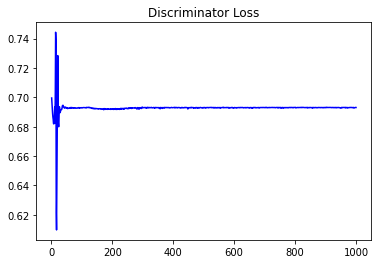

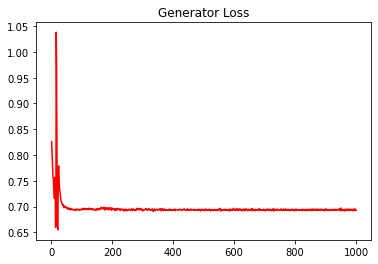

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23826565293097118


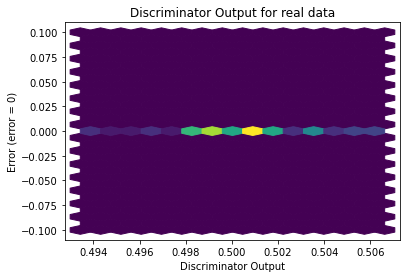

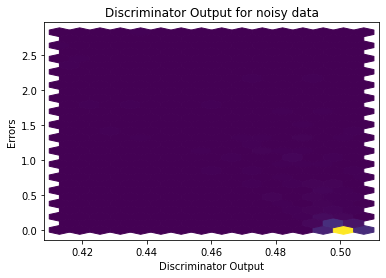

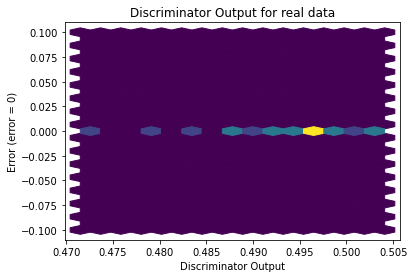

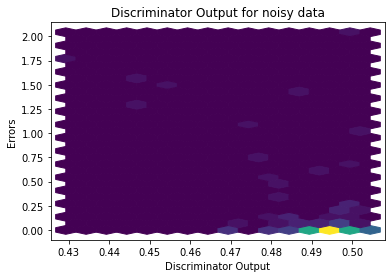

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


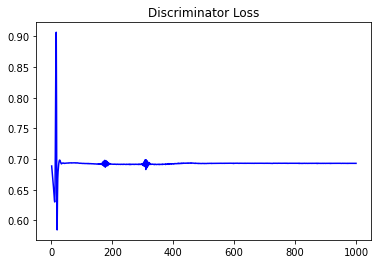

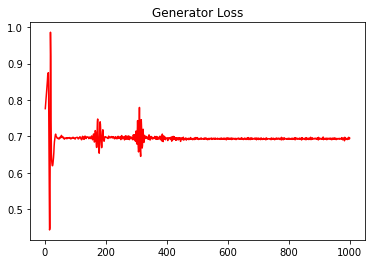

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.299897083891895


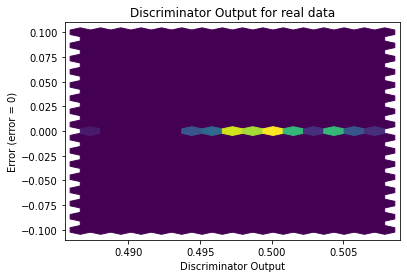

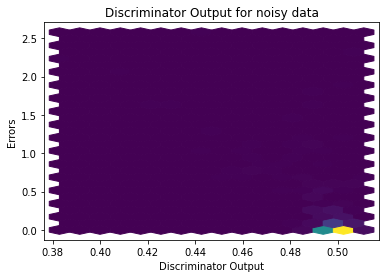

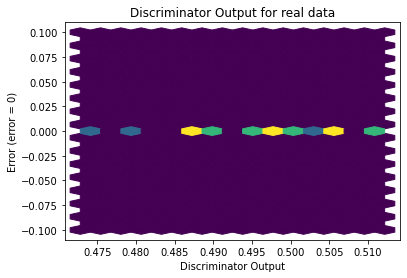

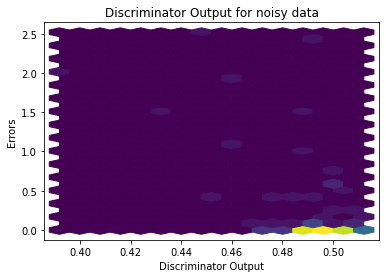

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0769]], requires_grad=True)
